In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import glob
import matplotlib
%matplotlib inline

In [297]:
fto = '/storage/experiments/2023/05_CERF/15/GEODOS/0.TXT'

l=[]
l.extend(range(0,1034))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python' )

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)

sn = df.loc[df[0]=='$AIRDOS',3]
fw = df.loc[df[0]=='$AIRDOS',2]
last = df.loc[df[0]=='$AIRDOS'].index
print ('s.n.: ',sn[0])
print ('f.v.: ',fw[0])
print(df.loc[df[0]=='$AIRDOS',1])
print(len(df))
print(last[-1:][0])

# keep only last run
#df.drop(df.index[:last[-1:][0]], inplace=True) 

s.n.:  1290c00806a20091e412a000a0000010
f.v.:  NaI(Tl)-D16x30
0       GEO_1024_v4
355     GEO_1024_v4
356     GEO_1024_v4
357     GEO_1024_v4
6586    GEO_1024_v4
Name: 1, dtype: object
6587
6586


In [254]:
df

,0,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,$AIRDOS,Fik8a_1024_v0,BC412-10x40x50,1290c00806a200918013a000a00000b6,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GPRMC,1543,154402.00,V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GPGGA,154402.00,NaN,NaN,NaN,NaN,0,00,99.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,$GPRMC,154403.00,V,NaN,NaN,NaN,NaN,NaN,NaN,131222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,$GPGGA,154403.00,NaN,NaN,NaN,NaN,0,00,99.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27807,$GPGGA,NaN,NaN,NaN,NaN,NaN,0,00,99.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27811,$GPRMC,NaN,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27813,$GPGGA,NaN,NaN,NaN,NaN,NaN,0,00,99.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27816,$TIME,39817.15,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Add individual events to histogram

In [298]:
HISTHITS = 25 # in version 4, number of channels in $HIST
HISTOGRAM = 8 # the first channel of histogram
FIRSTCH = 4 # the firs channel without noise

#df.dropna(subset=['UTC'], inplace=True)
hist = df.loc[df[0]=='$HIST'].iloc[:,:HISTOGRAM+HISTHITS].copy()
hist.iloc[:,1:] = hist.iloc[:,1:].apply(pd.to_numeric) #,errors='coerce')
#hist[0] = df[0]
#hist['alt'] = df['alt'].apply(pd.to_numeric,errors='coerce')
#hist['lat'] = df['lat'].apply(pd.to_numeric,errors='coerce')
#hist['lon'] = df['lon'].apply(pd.to_numeric,errors='coerce')
hist.reset_index(inplace=True, drop=True)
#df['meas'] = df.index
#hist['meas'] = df['meas'].apply(pd.to_numeric,errors='coerce')
#hist['UTC'] = df['UTC']
#hist.iloc[:,18:269] = 0
#hist.set_index('meas', inplace=True)

hits = df.loc[df[0]=='$HITS'].copy()
#hits['meas'] = hist.index
hits.iloc[:,1:] = hits.iloc[:,1:].apply(pd.to_numeric)
#hits['UTC'] = df['UTC']
#hits.set_index('meas', inplace=True)


In [299]:
hits.loc[hits[1]>500,1]=500
hits.reset_index(inplace=True, drop=True)

hitss = pd.DataFrame()
hitss = pd.DataFrame(0, index=np.arange(len(hits)), columns=range(1050))

try:
    durdev = 0
    for i in range(len(hits)):
        for j in range(hits.iloc[i,1]):
            hitss.iloc[i,int(hits.iloc[i,j*2+3])] +=1
except:
    print(i,j)
    raise
#hits.reset_index(inplace=True, drop=True)


In [227]:
hitss.iloc[:,20:]
#hist#.iloc[:,10:]
#df.iloc[:,6:]
histogram
hist.iloc[:,12:]

,12,13,14,15,16,17,18,19,20,21,...,23,24,25,26,27,28,29,30,31,32
0,153.0,2.0,0.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0
1,182.0,4.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0,2.0
2,135.0,5.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,...,0.0,1.0,3.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0
3,157.0,4.0,2.0,1.0,2.0,0.0,1.0,4.0,3.0,1.0,...,0.0,4.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0
4,149.0,4.0,3.0,1.0,6.0,2.0,2.0,1.0,0.0,1.0,...,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,161.0,4.0,5.0,4.0,8.0,10.0,2.0,3.0,8.0,5.0,...,2.0,6.0,2.0,3.0,1.0,0.0,2.0,4.0,2.0,4.0
3287,141.0,4.0,4.0,4.0,3.0,5.0,2.0,5.0,2.0,2.0,...,10.0,4.0,4.0,3.0,2.0,2.0,0.0,1.0,2.0,1.0
3288,128.0,3.0,4.0,8.0,7.0,6.0,6.0,2.0,2.0,1.0,...,2.0,6.0,6.0,6.0,3.0,3.0,3.0,2.0,0.0,2.0
3289,132.0,5.0,7.0,11.0,14.0,2.0,2.0,3.0,5.0,6.0,...,2.0,6.0,4.0,1.0,4.0,2.0,2.0,0.0,5.0,2.0


In [300]:
histogram = pd.DataFrame()
#histogram = hist.iloc[:,HISTOGRAM+FIRSTCH:HISTOGRAM+HISTHITS]
histogram = hist.iloc[:,13:]
histogram = histogram.rename(columns={x:y for x,y in zip(histogram.columns,range(0,25))})

#histogram = histogram.join(hitss.iloc[:,HISTHITS:])
histogram = histogram.join(hitss.iloc[:,25:])

histogram['temperature'] = hist[4]
histogram['pressure'] = hist[3]
histogram['voltage'] = hist[5]
histogram['current'] = hist[6]


In [253]:
hitss.iloc[:,25:]

,25,26,27,28,29,30,31,32,33,34,...,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049


In [252]:
histogram.iloc[:,20:]

,25,26,27,28,29,30,31,32,33,34,...,1044,1045,1046,1047,1048,1049,temperature,pressure,voltage,current
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.69,986.89,4.09,-110
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.63,986.91,4.09,-104
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.63,986.89,4.09,-101
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.63,986.89,4.09,-99
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.63,986.90,4.09,-96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.44,963.81,3.74,-103
7781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.44,963.86,3.74,-102
7782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.44,963.82,3.75,-102
7783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.44,963.83,3.74,-102


## Plot Flux

/tmp/ipykernel_12917/3531560996.py:45: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='grey', linestyle='-')
/tmp/ipykernel_12917/3531560996.py:46: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='grey', linestyle='-')


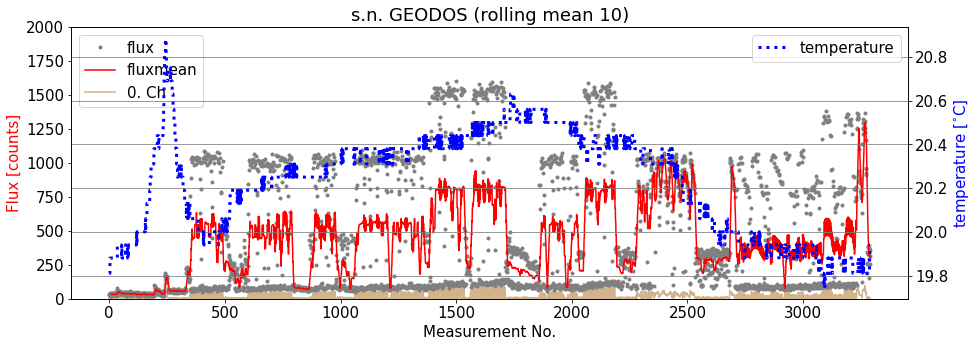

In [301]:
NOISE_LEVEL = 0
LAST_CHANNEL = 1023
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
#xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#xx = xx.loc['2022-1-1 00:00:00':'2022-2-1 00:00:00']
#xx = xx.loc['2022-2-13 00:00:00':'2022-2-22 00:00:00']
#xx = xx.loc['2022-4-25 00:00:00':'2022-4-25 8:00:00']
#xx = xx.loc['2022-1-16 00:00:00':'2022-1-21 00:00:00']
#xx = xx.loc['2021-11-17 00:00:00':'2021-11-18 00:00:00']
#xx = xx.loc['2022-07-17 00:00:00':'2022-07-17 19:50:00']
#xx = xx.loc['2022-07-17 20:00:00':'2022-07-17 23:50:00']
#xx = xx.loc['2023-03-31 15:00':'2023-03-31 15:35']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
plt.xlabel('Measurement No.')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=2)
plt.ylim([0,2000])

ax = plt.twinx()

xx['temperature'].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-post')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



# Energy Spectrum

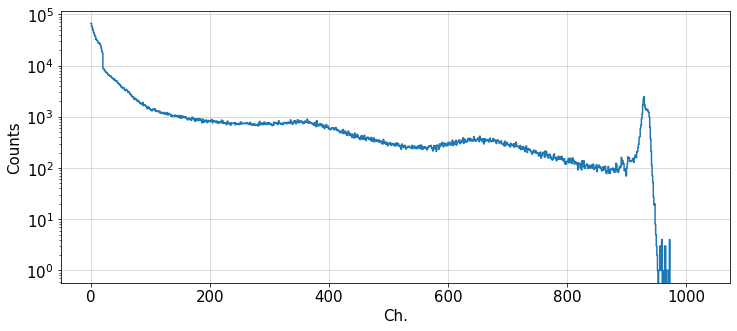

In [302]:
yy = histogram.copy()
#yy = yy.loc[500:1200]
#yy = yy.loc[1500:2500]
#yy = yy.loc[2600:]

#yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:1024],range(0,1024))})
ener = yy.iloc[:,0:1024].sum()
ener = ener.reset_index()
plt.figure(figsize=(12,5))
plt.plot(ener[0], drawstyle='steps-post')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='lightgrey')
#plt.xlim([1,100])
#plt.ylim([0,2e4])

In [304]:
fto = '/storage/experiments/2023/05_CERF/15/BALON/DATALOG.TXT'

print (fto)

l=[]
#l.extend(range(0,261))
l.extend(range(0,1032))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python' )
#df = pd.read_table(fto, sep=',', header=None,comment='*',engine='python' )

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

df.drop(df[df[0]=='$STROKE'].index, inplace=True)
df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)

sn = df.loc[df[0]=='$AIRDOS'][3]
print (sn[0])
#df.drop(df[df[0]=='$AIRDOS'].index, inplace=True)

# Convert strings to numbers
#df = df.apply(pd.to_numeric, errors='ignore')

#df.iloc[:,0:13]

#df

/storage/experiments/2023/05_CERF/15/BALON/DATALOG.TXT
1290c00806a200918013a000a00000b6


In [305]:
HISTHITS = 1024 # in version 4, number of channels in $HIST

hist = df.loc[df[0]=='$HIST'].copy()
hist.reset_index(inplace=True, drop=True)

histogram = pd.DataFrame()
histogram = hist.iloc[5000:,13:]
histogram = histogram.rename(columns={x:y for x,y in zip(histogram.columns,range(0,25))})


histogram['temperature'] = hist[4]
histogram['pressure'] = hist[3]
histogram['voltage'] = hist[5]
histogram['current'] = hist[6]

histogram = histogram.apply(pd.to_numeric)



/tmp/ipykernel_12917/2103559530.py:45: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='grey', linestyle='-')
/tmp/ipykernel_12917/2103559530.py:46: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='grey', linestyle='-')


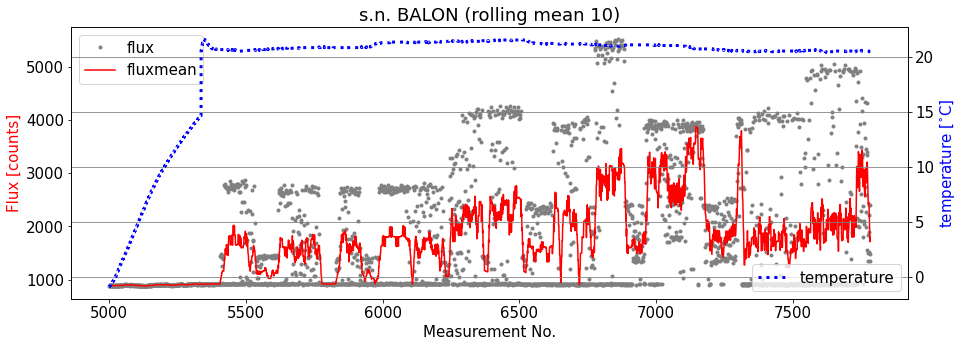

In [306]:
NOISE_LEVEL = 0
LAST_CHANNEL = 1023
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
#xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#xx = xx.loc['2022-1-1 00:00:00':'2022-2-1 00:00:00']
#xx = xx.loc['2022-2-13 00:00:00':'2022-2-22 00:00:00']
#xx = xx.loc['2022-4-25 00:00:00':'2022-4-25 8:00:00']
#xx = xx.loc['2022-1-16 00:00:00':'2022-1-21 00:00:00']
#xx = xx.loc['2021-11-17 00:00:00':'2021-11-18 00:00:00']
#xx = xx.loc['2022-07-17 00:00:00':'2022-07-17 19:50:00']
#xx = xx.loc['2022-07-17 20:00:00':'2022-07-17 23:50:00']
#xx = xx.loc['2023-03-31 15:00':'2023-03-31 15:35']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
#(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
plt.xlabel('Measurement No.')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=2)
#plt.ylim([0,2000])

ax = plt.twinx()

xx['temperature'].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-post')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



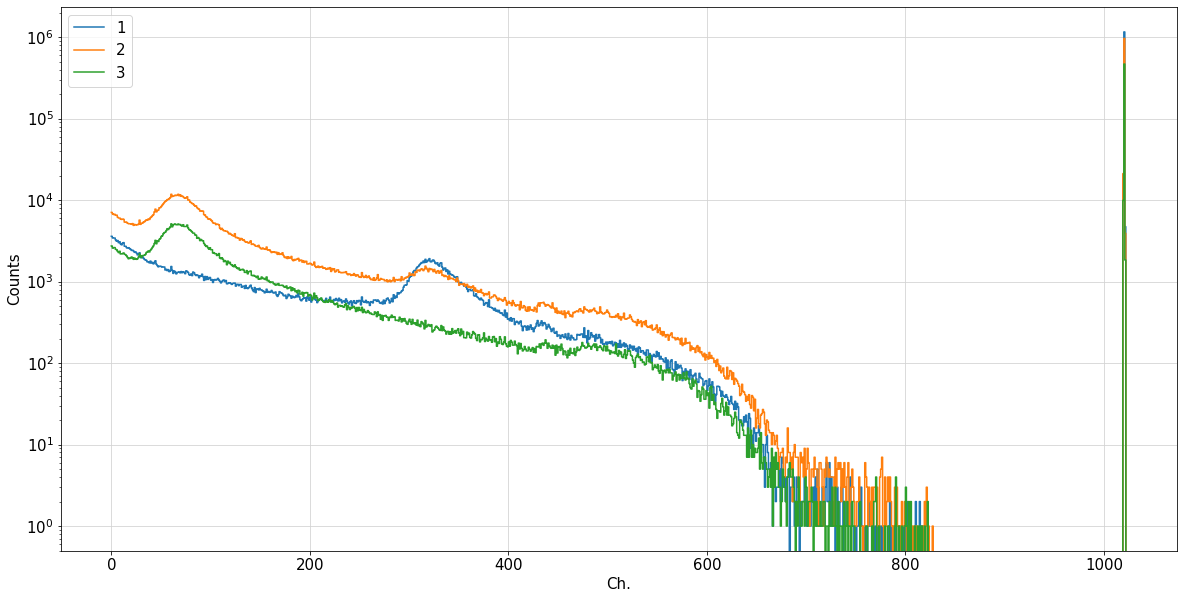

In [308]:
yy = histogram.copy()
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!yy = yy.loc[2000:]
yy = yy.loc[5000:6200]

#yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:1024],range(0,1024))})
ener = yy.iloc[:,0:1024].sum()
ener = ener.reset_index()
plt.figure(figsize=(20,10))
plt.plot(ener[0], drawstyle='steps-post', label='1')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='lightgrey')
#plt.xlim([1,100])
#plt.ylim([0,2e4])

yy = histogram.copy()
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!yy = yy.loc[2000:]
yy = yy.loc[6200:7200]

#yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:1024],range(0,1024))})
ener = yy.iloc[:,0:1024].sum()
ener = ener.reset_index()
plt.plot(ener[0], drawstyle='steps-post', label='2')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='lightgrey')
#plt.xlim([1,100])
#plt.ylim([0,2e4])

yy = histogram.copy()
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!yy = yy.loc[2000:]
yy = yy.loc[7300:]

#yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:1024],range(0,1024))})
ener = yy.iloc[:,0:1024].sum()
ener = ener.reset_index()
plt.plot(ener[0], drawstyle='steps-post', label='3')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='lightgrey')
#plt.xlim([1,100])
#plt.ylim([0,2e4])

plt.legend()